In [2]:
import pandas as pd 
import numpy as np
import math
from datetime import datetime

In [3]:
data = pd.read_csv("realEmtHashed.csv")

In [57]:
data.head()

,userID,timestamp,payeeEmail,isp,latitude,longitude,money_amount,money_type
0,044f9d391a27b59859fb3b274237671ff246bb9b69ae7d...,2018-06-01 19:02:54.026-0400,2fe5ce59f8fbac0fccaca974b9bb08ab4b2afe3d5703d1...,Cable Cable,44.53,-78.75,500.0,CAD
1,3ec92838d15518ea50355e7adfa01d470a7e49479c426d...,2018-06-01 05:37:11.480-0400,480e4ce89838a108880a7ba13475d9aa92e995476a86ea...,Primus Telecommunications Canada,43.89,-78.88,2571.0,CAD
2,0f772a1e33aec1998c7a917e5cf67f30eeb485db693c57...,2018-06-01 00:44:01.691-0400,02fc4c55153e0f1645e8c3b24a0d225aa09a3e6806a652...,Bell Canada,45.73,-73.71,1025.0,CAD
3,30e1bb678ca1426e122bdb953a2320abbacd14a1dd093b...,2018-06-01 00:33:22.304-0400,7e28bb7504342ed3806218195ab31d7dcab330cc7511ad...,Amanah Tech,43.65,-79.42,1510.0,CAD
4,5f1331872f036401287146d98e5b7f9d23a24a789b4d72...,2018-06-01 19:27:57.245-0400,42ad4701060ceaebd11b09360ca9a24d75d217f90921de...,Distributel Communications,45.55,-73.58,69.0,CAD


# Recatagorizing Data
## Changed the column headings to the sender account number with attributes about the sender account as the rows.

In [4]:
test_len = 10000
data_len = len(data)
new_data = {}
start_time = datetime.now()

for i in range(test_len): 
    row = data.iloc[i]
    sender = row['userID']
    amount = row['money_amount']
    location = (row['latitude'],row['longitude'])
    time = row['timestamp']
    ISP = row['isp']
    
    if sender not in new_data: 
        new_data[sender] = {'transactions':1,'amounts':[],'locations':[],'time_stamps':[],'senderISP':[]}
    else:
        new_data[sender]['transactions'] += 1
    
    new_data[sender]['amounts'].append(amount)
    new_data[sender]['time_stamps'].append(time)

    if location not in new_data[sender]['locations']:
        new_data[sender]['locations'].append(location)
        
    if ISP not in new_data[sender]['senderISP']:
        new_data[sender]['senderISP'].append(ISP)
        
duration = datetime.now() - start_time
print("Parsed data in: ", duration)

Parsed data in:  0:00:02.641975


# Saving New Dataset

In [5]:
sender = pd.DataFrame.from_dict(new_data)

In [6]:
sender.head()

,044f9d391a27b59859fb3b274237671ff246bb9b69ae7d66db3a7a3875b9520d,3ec92838d15518ea50355e7adfa01d470a7e49479c426db3ffc65befe6a2e622,0f772a1e33aec1998c7a917e5cf67f30eeb485db693c57da470cf67d340c2453,30e1bb678ca1426e122bdb953a2320abbacd14a1dd093b77a4b2f33d84fc937e,5f1331872f036401287146d98e5b7f9d23a24a789b4d72c3731dcabfc67bbc48,a844f08602b27f68ecbe4685991c427948dc3ade39775ea3d29e99bc1c789c1d,800012ea1c431863b68eff6dbf714090466718395a6158b76e62b9e16b63d6f8,01fad62c3e5b6cbf95a26d59abd3249796e56a1caa027b013b470e06ffc4afba,8b11e3e97273699aeca08dbb84f884921c53f7af83144143166db368cb1b7df7,831b7e058c9542cea19d2fecbebf0e838ee5a0ccaabe06e9b13eab2940cd9c0f,...,e5c5ac9bf2d3b1b114043affb014ad06b1e50b9260ed033151afb18c26f499f6,8b566b63fef7abd0f0dcc8922843e912785d874fe04d1b24940041e783352539,4d42f17b6c4d47cf80eae6a320b95a085b432072872d231bb622e6f95648a58d,756c9da3bf360f62768fb6b7e773ed34225258114e6d098cbdf66d62011e63e9,7ac76c06631a5afc4653c863e5b54bf6c8c1c373c1cefc7c621878ced76d727e,be48cb3dd8e3c86de691d529f629389d644c58edd95ff2c0e3a303885eaf869f,5a235665dc8c09a3eb1de698157d411f58c0ececc41416959a421441e639f1fe,9b77150c5a7ef68ca2f11936739540e99ccb3ce0c21fe594f36ea48091c4c59b,6af6f566da1e80d797352fc9f17e1cff9218d0e8b49932020da1a85424f54822,c7be6a75a5cfb169e57422f4833933b3e8c4399e2ace222b86ce03f80046899e
transactions,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
amounts,[500.0],[2571.0],[1025.0],[1510.0],[69.0],[820.0],[666.66],[350.0],[2776.57],[200.0],...,[207.9],[480.0],[845.0],[300.0],[925.0],[1050.0],[1550.0],[3000.0],[179.0],[50.0]
locations,"[(44.53, -78.75)]","[(43.89, -78.88)]","[(45.73, -73.71)]","[(43.65, -79.42)]","[(45.55, -73.58)]","[(50.05, -119.29)]","[(48.48, -123.37)]","[(45.33, -75.67)]","[(49.28, -123.11)]","[(49.92, -96.96)]",...,"[(53.91, -122.75)]","[(51.08, -113.96)]","[(45.44, -73.46)]","[(49.93, -105.97)]","[(49.26, -123.16)]","[(43.87, -79.44)]","[(49.19, -122.94)]","[(51.03, -113.82)]","[(43.65, -79.48)]","[(43.78, -79.42)]"
time_stamps,[2018-06-01 19:02:54.026-0400],[2018-06-01 05:37:11.480-0400],[2018-06-01 00:44:01.691-0400],[2018-06-01 00:33:22.304-0400],[2018-06-01 19:27:57.245-0400],[2018-06-01 00:12:43.788-0400],[2018-06-01 11:05:43.082-0400],[2018-06-01 14:00:51.380-0400],[2018-06-01 15:52:35.582-0400],[2018-06-01 08:22:02.319-0400],...,[2018-06-01 16:05:34.136-0400],[2018-06-01 18:26:56.105-0400],[2018-06-01 06:35:16.467-0400],[2018-06-01 12:46:47.714-0400],[2018-06-01 13:34:44.598-0400],[2018-06-01 09:22:47.131-0400],[2018-06-01 10:41:38.070-0400],[2018-06-01 08:50:27.956-0400],[2018-06-01 14:40:53.559-0400],[2018-06-01 07:54:21.376-0400]
senderISP,[Cable Cable],[Primus Telecommunications Canada],[Bell Canada],[Amanah Tech],[Distributel Communications],[Shaw Communications],[Shaw Communications],[Shared Services Canada],[Bell Canada],[Shaw Communications],...,[Shaw Communications],[CIK Telecom],[ACN DSL],[SaskTel],[Telus Communications],[York Region District School Board],[Telus Communications],[Telus Communications],[Bell Canada],[Bell Canada]


In [7]:
mean_amount = []   

#Mean transaction amount per account ID
for name in sender.iteritems():
    value = name[1]['amounts']
    amount = 0 
    bad_values = 0
    #Using a loop and not sum because the some of the fucks in here are strings
    for item in value:
        try:
            amount += float(item)
        except ValueError: 
            bad_values += 1 
    
    transaction_number = len(value) - bad_values
    
    if transaction_number != 0:
        mean = amount/transaction_number
        mean_amount.append(mean)
    else: 
        mean_amount.append(0)
        
sender.loc['mean_transaction_amount'] = mean_amount

In [8]:
#Standard Deviation for amounts 
std_dev = []
z_score = [] 
for name in sender.iteritems(): 
    value = name[1]['amounts']
    mean = name[1]['mean_transaction_amount']
    variance = 0 
    bad_values = 0 
    for item in value: 
        try: 
            variance += math.pow((float(item) - mean),2)
        except: 
            bad_values += 1
    
    transaction_number = len(value) - bad_values 
    if transaction_number != 0: 
        std = math.sqrt(variance)/transaction_number
        std_dev.append(std)
    else: 
        std_dev.append(0)
        
sender.loc['transacton_std_dev'] = std_dev

In [9]:
#Number of Different ISP's 
ISP_changes = [] 

for name in sender.iteritems(): 
    value = name[1]['senderISP']
    ISP_changes.append(len(value))
    
sender.loc['total_ISPs'] = ISP_changes

In [10]:
def timeBetweenFirstLast(dates):
    '''
    Given a list of dates of the form %Y-%m-%d %H:%M:%S.%f%z return a datetime.timedelta
    object that contains the amount of time between the first and last (chronologically) dates
    '''
    # convert to datetime objects
    datetimes = []
    for date in dates:
        datetimes.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f%z"))
     
    # sort chronologically
    datetimes.sort()

    # return time between first and last dates
    return np.abs(datetimes[-1] - datetimes[0])

transaction_frequency = [] 
for name in sender.iteritems(): 
    value = name[1]['time_stamps']
    difference = timeBetweenFirstLast(value)
    transaction_frequency.append(((difference/name[1]['transactions']).total_seconds())/86400)
#TODO: Rename time between transactions
sender.loc['transaction_frequency'] = transaction_frequency

In [11]:
sender.head(15)

,044f9d391a27b59859fb3b274237671ff246bb9b69ae7d66db3a7a3875b9520d,3ec92838d15518ea50355e7adfa01d470a7e49479c426db3ffc65befe6a2e622,0f772a1e33aec1998c7a917e5cf67f30eeb485db693c57da470cf67d340c2453,30e1bb678ca1426e122bdb953a2320abbacd14a1dd093b77a4b2f33d84fc937e,5f1331872f036401287146d98e5b7f9d23a24a789b4d72c3731dcabfc67bbc48,a844f08602b27f68ecbe4685991c427948dc3ade39775ea3d29e99bc1c789c1d,800012ea1c431863b68eff6dbf714090466718395a6158b76e62b9e16b63d6f8,01fad62c3e5b6cbf95a26d59abd3249796e56a1caa027b013b470e06ffc4afba,8b11e3e97273699aeca08dbb84f884921c53f7af83144143166db368cb1b7df7,831b7e058c9542cea19d2fecbebf0e838ee5a0ccaabe06e9b13eab2940cd9c0f,...,e5c5ac9bf2d3b1b114043affb014ad06b1e50b9260ed033151afb18c26f499f6,8b566b63fef7abd0f0dcc8922843e912785d874fe04d1b24940041e783352539,4d42f17b6c4d47cf80eae6a320b95a085b432072872d231bb622e6f95648a58d,756c9da3bf360f62768fb6b7e773ed34225258114e6d098cbdf66d62011e63e9,7ac76c06631a5afc4653c863e5b54bf6c8c1c373c1cefc7c621878ced76d727e,be48cb3dd8e3c86de691d529f629389d644c58edd95ff2c0e3a303885eaf869f,5a235665dc8c09a3eb1de698157d411f58c0ececc41416959a421441e639f1fe,9b77150c5a7ef68ca2f11936739540e99ccb3ce0c21fe594f36ea48091c4c59b,6af6f566da1e80d797352fc9f17e1cff9218d0e8b49932020da1a85424f54822,c7be6a75a5cfb169e57422f4833933b3e8c4399e2ace222b86ce03f80046899e
transactions,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
amounts,[500.0],[2571.0],[1025.0],[1510.0],[69.0],[820.0],[666.66],[350.0],[2776.57],[200.0],...,[207.9],[480.0],[845.0],[300.0],[925.0],[1050.0],[1550.0],[3000.0],[179.0],[50.0]
locations,"[(44.53, -78.75)]","[(43.89, -78.88)]","[(45.73, -73.71)]","[(43.65, -79.42)]","[(45.55, -73.58)]","[(50.05, -119.29)]","[(48.48, -123.37)]","[(45.33, -75.67)]","[(49.28, -123.11)]","[(49.92, -96.96)]",...,"[(53.91, -122.75)]","[(51.08, -113.96)]","[(45.44, -73.46)]","[(49.93, -105.97)]","[(49.26, -123.16)]","[(43.87, -79.44)]","[(49.19, -122.94)]","[(51.03, -113.82)]","[(43.65, -79.48)]","[(43.78, -79.42)]"
time_stamps,[2018-06-01 19:02:54.026-0400],[2018-06-01 05:37:11.480-0400],[2018-06-01 00:44:01.691-0400],[2018-06-01 00:33:22.304-0400],[2018-06-01 19:27:57.245-0400],[2018-06-01 00:12:43.788-0400],[2018-06-01 11:05:43.082-0400],[2018-06-01 14:00:51.380-0400],[2018-06-01 15:52:35.582-0400],[2018-06-01 08:22:02.319-0400],...,[2018-06-01 16:05:34.136-0400],[2018-06-01 18:26:56.105-0400],[2018-06-01 06:35:16.467-0400],[2018-06-01 12:46:47.714-0400],[2018-06-01 13:34:44.598-0400],[2018-06-01 09:22:47.131-0400],[2018-06-01 10:41:38.070-0400],[2018-06-01 08:50:27.956-0400],[2018-06-01 14:40:53.559-0400],[2018-06-01 07:54:21.376-0400]
senderISP,[Cable Cable],[Primus Telecommunications Canada],[Bell Canada],[Amanah Tech],[Distributel Communications],[Shaw Communications],[Shaw Communications],[Shared Services Canada],[Bell Canada],[Shaw Communications],...,[Shaw Communications],[CIK Telecom],[ACN DSL],[SaskTel],[Telus Communications],[York Region District School Board],[Telus Communications],[Telus Communications],[Bell Canada],[Bell Canada]
mean_transaction_amount,500,2571,1025,1510,69,820,666.66,350,2776.57,200,...,207.9,480,845,300,925,1050,1550,3000,179,50
transacton_std_dev,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total_ISPs,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
transaction_frequency,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Clustering Data

In [12]:
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [13]:
cluster_amount = 5

In [14]:
mstd = [] 
m_total_transactions = [] 
mtransf = [] 
mean_ISP = [] 

transf_std = [] 
transf_total_transactions = [] 
transf_ISP = []  

ISP_std = [] 
ISP_total_transactions = [] 

total_transactions_std = [] 

for name in sender.iteritems(): 
    account_num = name[0]
    value = name[1]
    
    total_transaction = value['transactions']
    mean_trans = value['mean_transaction_amount']
    std_trans = value['transacton_std_dev']
    trans_frequency = value['transaction_frequency']
    senderISP = value['total_ISPs']
    
    mstd.append([mean_trans,std_trans])
    m_total_transactions.append([mean_trans,total_transaction])
    mtransf.append([trans_frequency,mean_trans])
    mean_ISP.append([senderISP,mean_trans])
    
    transf_std.append([trans_frequency,std_trans])
    transf_total_transactions.append([trans_frequency,total_transaction])
    transf_ISP.append([senderISP,trans_frequency])
    
    ISP_total_transactions.append([senderISP,total_transaction])
    ISP_std.append([senderISP,std_trans])
    
    total_transactions_std.append([total_transaction,std_trans])


mstd = sklearn.preprocessing.scale(mstd)
m_total_transactions = sklearn.preprocessing.scale(m_total_transactions)
mtransf = sklearn.preprocessing.scale(mtransf)
mean_ISP = sklearn.preprocessing.scale(mean_ISP)
transf_std = sklearn.preprocessing.scale(transf_std)
transf_total_transactions = sklearn.preprocessing.scale(transf_total_transactions)
transf_ISP = sklearn.preprocessing.scale(transf_ISP)
ISP_std = sklearn.preprocessing.scale(ISP_std)
ISP_total_transactions = sklearn.preprocessing.scale(ISP_total_transactions)
total_transactions_std = sklearn.preprocessing.scale(total_transactions_std)

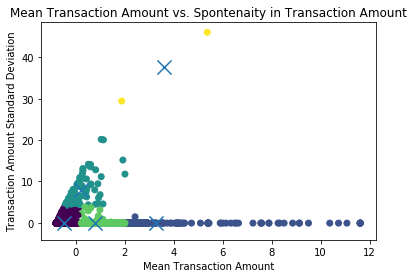

In [15]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(mstd)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in mstd: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Mean Transaction Amount vs. Spontenaity in Transaction Amount')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Mean Transaction Amount')
plt.show()

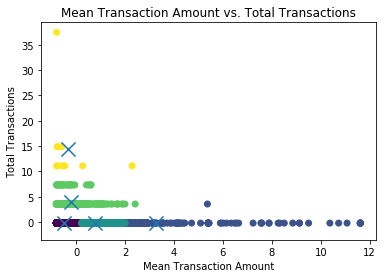

In [16]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(m_total_transactions)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in m_total_transactions: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Mean Transaction Amount vs. Total Transactions')
plt.ylabel('Total Transactions')
plt.xlabel('Mean Transaction Amount')
plt.show()

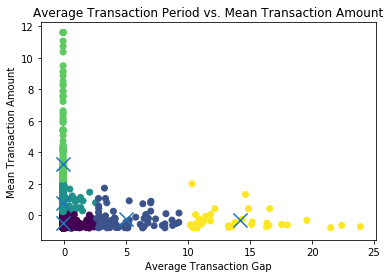

In [17]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(mtransf)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in mtransf: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Mean Transaction Amount')
plt.xlabel('Average Transaction Gap')
plt.ylabel('Mean Transaction Amount')
plt.show()

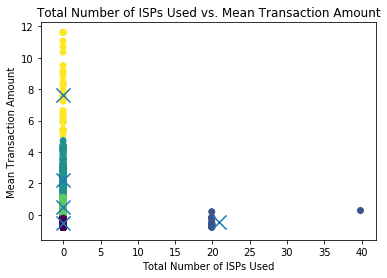

In [18]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(mean_ISP)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in mean_ISP: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Number of ISPs Used vs. Mean Transaction Amount')
plt.xlabel('Total Number of ISPs Used')
plt.ylabel('Mean Transaction Amount')
plt.show()

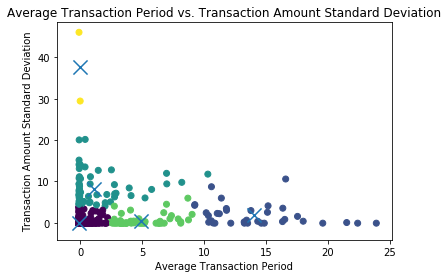

In [19]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(transf_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in transf_std: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Average Transaction Period')
plt.show()

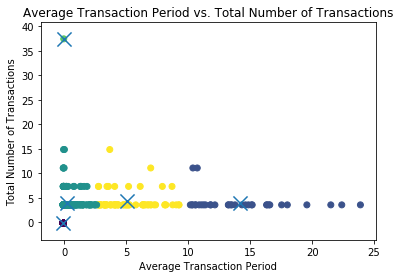

In [20]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(transf_total_transactions)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in transf_total_transactions: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Total Number of Transactions')
plt.ylabel('Total Number of Transactions')
plt.xlabel('Average Transaction Period')
plt.show()

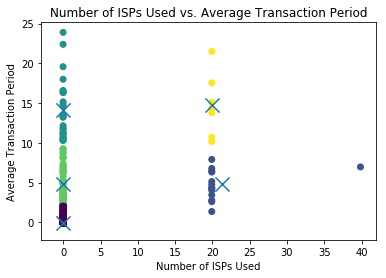

In [21]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(transf_ISP)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in transf_ISP: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Average Transaction Period')
plt.xlabel('Number of ISPs Used')
plt.ylabel('Average Transaction Period')
plt.show()

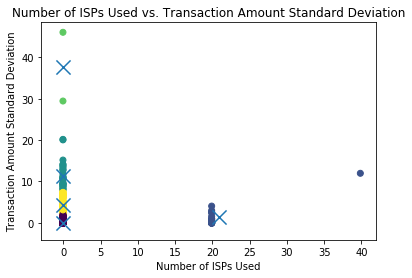

In [22]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(ISP_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in ISP_std: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Number of ISPs Used')
plt.show()

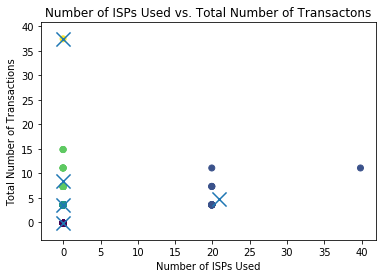

In [23]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(ISP_total_transactions)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in ISP_total_transactions: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Total Number of Transactons')
plt.ylabel('Total Number of Transactions')
plt.xlabel('Number of ISPs Used')
plt.show()

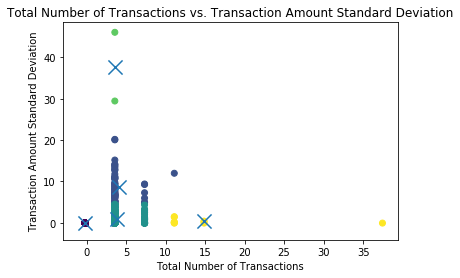

In [24]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(total_transactions_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in total_transactions_std: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Number of Transactions vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Total Number of Transactions')
plt.show()